<a href="https://colab.research.google.com/github/Ozmanthus/Magisk/blob/master/Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Use Stable Diffusion to Generate Images

In this Colab notebook, we will see how to set up and run Stable Diffusion on Linux in order to generate images from a textual caption.

**Note that you will need [Colab Pro](https://colab.research.google.com/signup) in order to use this script given that the free version of Colab has slightly too little VRAM to generate images**. If you would like the see the equivalent notebook for CPUs (completely free), see the [related notebook](https://colab.research.google.com/drive/1NA8XytvxOT841JtaTao896Gm_SFT66N4?usp=sharing). Note that image generation will be much slower with this method.

See [How to Run Stable Diffusion Locally to Generate Images](www.assemblyai.com/blog/how-to-run-stable-diffusion-locally-to-generate-images/) to learn how to use Stable Diffusion on your local machine.

# Setup

## Step 1: Change Hardware Accelerator to GPU

Stable Diffusion requires a GPU to operate, so we'll first need to change the runtime to utilize a GPU. In the top left hand corner of the window, click *Runtime > Change runtime type* and then under *Hardware Accelerator*, click the dropdown and select *GPU*.

You will need to select the "High RAM" (exclusive to Colab Pro / Colab Pro+ users) option in order to allocate enough RAM to run Stable Diffusion.

<table><tr>
<td> 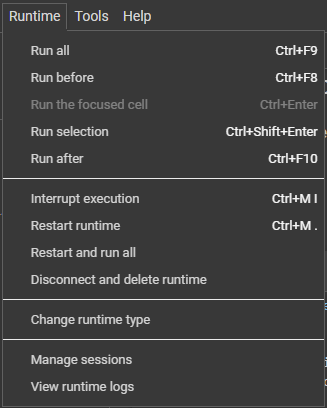 </td>


<td> 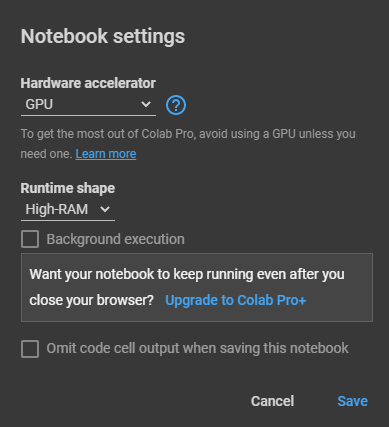 </td>
</tr></table>

## Step 2: Install Miniconda

We now need to install Miniconda for this Colab Notebook's version of Python (3.7). Let's do that now:

### a) Fetch installation script

Fetch the Miniconda installation script with the below command:

In [1]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh

--2023-01-23 05:29:50--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   368MB/s    in 0.3s    

2023-01-23 05:29:50 (368 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]



### b) Run the Installation Script

Next we need to install Miniconda with the below commands:

In [2]:
!chmod +x Miniconda3-py37_4.12.0-Linux-x86_64.sh

!bash ./Miniconda3-py37_4.12.0-Linux-x86_64.sh -b -f -p /usr/local

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    - charset-normalizer==2.0.4=pyhd3eb1b0_0
    - colorama==0.4.4=pyhd3eb1b0_0
    - conda-content-trust==0.1.1=pyhd3eb1b0_0
    - conda-package-handling==1.8.1=py37h7f8727e_0
    - conda==4.12.0=py37h06a4308_0
    - cryptography==36.0.0=py37h9ce1e76_0
    - idna==3.3=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.3=h7f8727e_2
    - openssl==1.1.1n=h7f8727e_0
    - pip==21.2.2=py37h06a4308_0
    - pycosat==0.6.3=py37h27cfd23_0
    - pycparser==2.21=pyhd3eb1b0_

### c) Initialize conda

Finally, we initialize conda with the below command:

In [3]:
!conda init bash

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.7/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
modified      /root/.bashrc

==> For changes to take effect, close and re-open your current shell. <==



## Step 3: Download Stable Diffusion

Now that conda is installed, we're ready to download the Stable Diffusion Model.

### a) Download the Repository

First, we need to download the Stable Diffusion source code. Clone the Stable Diffusion repository and then navigate into it with the below commands:

In [5]:
# Clone the repo
!git clone https://github.com/chemistzombie/stable-diffusion-unfiltered.git
import os
os.chdir('stable-diffusion-unfiltered')

fatal: destination path 'stable-diffusion-unfiltered' already exists and is not an empty directory.


### b) Creating and Activate the Environment

Now, use the cloned `environment.yaml` file to update the notebook's environment with the below command:

In [6]:
!conda env update -n base -f environment.yaml

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

libwebp-base-1.2.2   | 440 KB    | : 100% 1.0/1 [00:00<00:00, 10.53it/s]
gnutls-3.6.15        | 1.0 MB    | : 100% 1.0/1 [00:00<00:00, 12.64it/s]
cffi-1.15.0          | 224 KB    | : 100% 1.0/1 [00:00<00:00, 15.58it/s]
conda-package-stream | 26 KB     | : 100% 1.0/1 [00:00<00:00, 19.60it/s]
flit-core-3.6.0      | 42 KB     | : 100% 1.0/1 [00:00<00:00, 17.90it/s]
libunistring-0.9.10  | 536 KB    | : 100% 1.0/1 [00:00<00:00, 15.74it/s]
libpng-1.6.37        | 278 KB    | : 100% 1.0/1 [00:00<00:00, 17.33it/s]
setuptools-65.6.3    | 1.1 MB    | : 100% 1.0/1 [00:00<00:00,  8.30it/s]
nettle-3.7.3         | 809 KB    | : 100% 1.0/1 [00:00<00:00, 14.30it/s]
pytorch-1.11.0       | 1.02 GB   | : 100

### C) Download the Model Weights

Now it's time to download the weights for the model. Do so with the below command, making sure to read and accept [the license](https://github.com/CompVis/stable-diffusion/blob/main/LICENSE) beforehand:

In [7]:
!curl https://f004.backblazeb2.com/file/aai-blog-files/sd-v1-4.ckpt > sd-v1-4.ckpt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4067M  100 4067M    0     0  15.2M      0  0:04:25  0:04:25 --:--:-- 16.8M


# Generating Images with Stable Diffusion

Now that everything is installed, we are prepared to generate images with Stable Diffusion. **Recall from above that you will need [Colab Pro](https://colab.research.google.com/signup) in order to do this given that the free version of Colab does not provide enough VRAM to run Stable Diffusion**.

If you have Colab Pro, simply run the below command, changing the prompt to whatever you want. You can see [here](https://www.assemblyai.com/blog/how-to-run-stable-diffusion-locally-to-generate-images/#script-options) for more information on the script arguments.


In [52]:
!python scripts/txt2img.py \
--plms \
--ckpt sd-v1-4.ckpt \
--skip_grid \
--n_samples 1  \
--n_iter 1 \
--outdir . \
--seed 119 \
--ddim_steps 100 \
--prompt "killer apes wielding lasers rifles protecting a diamond mine in an ancient city"

Global seed set to 119
Loading model from sd-v1-4.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.20.mlp.fc1.weight', 'vision_model.encoder.layers.0.self_attn.out_proj.bias', 'vision_model.encoder.layers.20.self_attn.k_proj.bias', 'vision_model.encoder.layers.21.self_attn.q_proj.weight', 'vision_model.encoder.layers.10.mlp.fc2.weight', 'vision_model.encoder.layers.14.layer_norm2.bias', 'vision_model.encoder.layers.22.self_attn.v_proj.weight', 'vision_model.pre_layrnorm.bias', 'vision_model.encoder.layers.20.layer_norm2.bias', 'vision_model.encoder.layers.13.layer_norm2.weight', 'vision_model.encoder.layers.6.mlp.

If you generated multiple images (or ran the above cell multiple times with different promtps) you can view different images by changing the number `00000` in the command below. E.g. `00001.png` will display the *second* generated image.

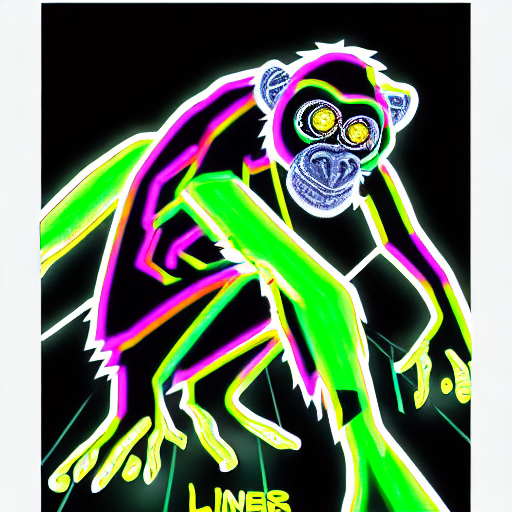

In [51]:
from IPython.display import Image
Image('/content/stable-diffusion-unfiltered/samples/00015.png')

# Downloading Images

You can download the generated image with the below command:

In [13]:
from google.colab import files as FILE
FILE.download("/content/stable-diffusion-unfiltered/samples/00000.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If you have multiple generated images and want to download the entire `samples` folder, first zip it and then download it with the below commands:

In [15]:
!zip -r /content/stable-diffusion-unfiltered/samples.zip /content/stable-diffusion-unfiltered/samples/
FILE.download('/content/stable-diffusion-unfiltered/samples.zip')

  adding: content/stable-diffusion-unfiltered/samples/ (stored 0%)
  adding: content/stable-diffusion-unfiltered/samples/00000.png (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You can delete the contents of the `samples` folder and `samples.zip` to keep the directory clean if you want to run multiple samplings with different prompts.

The below commands are commented out by default to avoid accidental deletion - uncomment them and run the cell in order to delete all of the generated images / ZIP file.

In [ ]:
#!rm -rf /content/stable-diffusion/samples
#!rm /content/stable-diffusion/samples.zip

rm: cannot remove '/content/stable-diffusion/samples.zip': No such file or directory


To run another prompt, simply start at the **Generating Images with Stable Diffusion** section and follow along as before!

# Final Words

That's all it takes to generate images using the new Stable Diffusion model - don't forget to share your fun creations with us on [Twitter](https://twitter.com/AssemblyAI)! If you want to learn more about how Stable Diffusion works, you can check out our [Introduction to Diffusion Models for Machine Learning](https://www.assemblyai.com/blog/diffusion-models-for-machine-learning-introduction/) article. If you enjoyed this article, feel free to check out more of our [blog](https://www.assemblyai.com/blog/) or [YouTube channel](https://www.youtube.com/c/AssemblyAI) for Machine Learning content, or feel free to [follow our newsletter](https://assemblyai.us17.list-manage.com/subscribe?u=cb9db7b18b274c2d402a56c5f&id=2116bf7c68) to stay in the loop for new releases.